# POS Tagging
   By Heidi Nguyen

<a id="top"></a>

# Table of Contents 

- [I. Nltk POS Tagging for Long Sentence and Short Sentence](#POSLongShort)

- [II. Nltk POS vs. Pattern POS Taggers](#nltkpattern)

- [III. Manual Tagging vs. Nltk POS and Pattern POS](#manualpos)

- [IV. Reference](#ref)

- [V. Appendix](#appd)



In [11]:
# libraries
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from collections import Counter
import os # to set wd # # os.environ['KERAS_BACKEND']='tensorflow' for keras
import re
import sys

# download the csv files with urllib2
import urllib2

# get time stamp
import time
import csv
from datetime import datetime

# import Image
from IPython.display import Image

# json 
import json 
import requests
# BeautifulSoup 
from bs4 import BeautifulSoup
import  codecs # that’s to take care of things like accented characters, which are represented in different ways on

from __future__ import division
import networkx
import nltk

from __future__ import print_function
# Set wd
path = "/Users/heidinguyen/Downloads/"
os.chdir(path)
# print os.getcwd(); # Prints the working directory

<a id="POSLongShort"></a>

# Nltk POS Tagging for Long Sentence and Short Sentence:

1. Run one of the part-of-speech (POS) taggers available in Python.
   
       a. Find the longest sentence you can, longer than 10 words, that the POS tagger tags
        correctly. Show the input and output.
    
        b. Find the shortest sentence you can, shorter than 10 words, that the POS tagger fails to
        tag 100 percent correctly. Show the input and output. Explain your conjecture as to why the tagger might have been less than perfect with this sentence.
        
 <a href="#top">Back to top</a>

## 1a: Running nltk’s recommended POG function pos_tag() for a long sentence

    nltk’s recommended pos_tag() function is actually based on the Penn Treebank. 
    
    Long Sentence: 

    Its vanished trees, the trees that had made way for Gatsby’s house, had once pandered in whispers to the last and greatest of all human dreams; for a transitory enchanted moment man must have held his breath in the presence of this continent, compelled into an aesthetic contemplation he neither understood nor desired, face to face for the last time in history with something commensurate to his capacity for wonder.  - from  The Great Gatsby, F. Scott Fitzgerald.
    
 <a href="#top">Back to top</a>

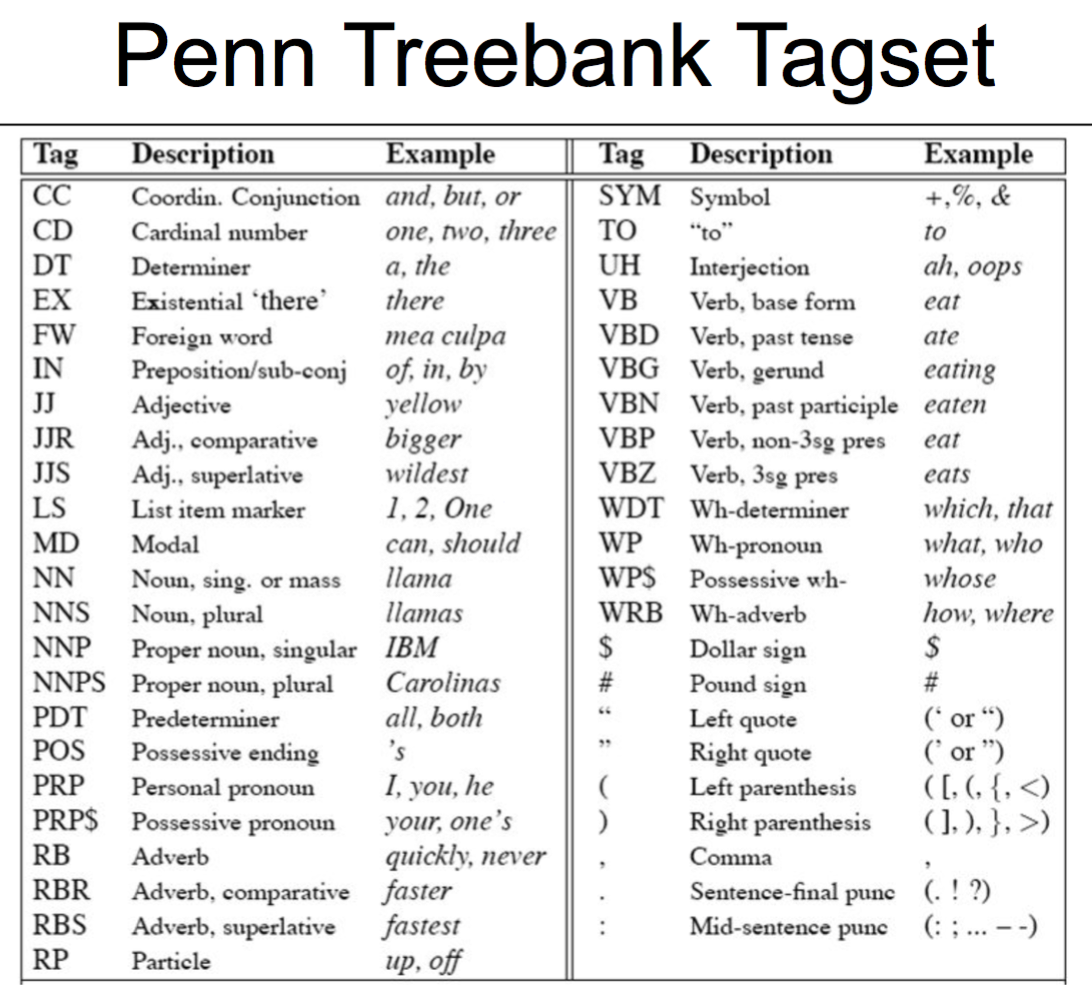

In [12]:
# Data Type Image. 
from IPython.display import Image
Image(filename='Screen Shot 2018-10-22 at 8.38.04 AM.jpg')


In [9]:
# function to break the excerpt into sentences, then words
def tokenize_text(document):
    sentences = nltk.sent_tokenize(document)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens

In [3]:
lg_sentence = 'Its vanished trees, the trees that had made way for Gatsby’s house, had once pandered in whispers to the last and greatest of all human dreams; for a transitory enchanted moment man must have held his breath in the presence of this continent, compelled into an aesthetic contemplation he neither understood nor desired, face to face for the last time in history with something commensurate to his capacity for wonder.'
lg_sentence 


'Its vanished trees, the trees that had made way for Gatsby\xe2\x80\x99s house, had once pandered in whispers to the last and greatest of all human dreams; for a transitory enchanted moment man must have held his breath in the presence of this continent, compelled into an aesthetic contemplation he neither understood nor desired, face to face for the last time in history with something commensurate to his capacity for wonder.'

In [4]:
# give the POS tag the lg_sentence
word_tokens  = nltk.word_tokenize(lg_sentence) 
for (i, item) in enumerate(word_tokens):
    if '\xe2\x80\x99' in item:
        word_tokens[i] = item.replace("\xe2\x80\x99", "'")
#         print (i, word_tokens[i]) 
#         mylist[i] = 0
#     print (sentence)

# nltk.pos_tag(word_tokens)
# word_tokens
print (word_tokens)

['Its', 'vanished', 'trees', ',', 'the', 'trees', 'that', 'had', 'made', 'way', 'for', "Gatsby's", 'house', ',', 'had', 'once', 'pandered', 'in', 'whispers', 'to', 'the', 'last', 'and', 'greatest', 'of', 'all', 'human', 'dreams', ';', 'for', 'a', 'transitory', 'enchanted', 'moment', 'man', 'must', 'have', 'held', 'his', 'breath', 'in', 'the', 'presence', 'of', 'this', 'continent', ',', 'compelled', 'into', 'an', 'aesthetic', 'contemplation', 'he', 'neither', 'understood', 'nor', 'desired', ',', 'face', 'to', 'face', 'for', 'the', 'last', 'time', 'in', 'history', 'with', 'something', 'commensurate', 'to', 'his', 'capacity', 'for', 'wonder', '.']


In [89]:
# Tag the sentence using nltk’s recommended pos_tag() function
words_pos_tag = nltk.pos_tag(word_tokens)

# put in a dataframe and assign whether for not the tagging is accurate
df_pos_lg  = pd.DataFrame([[k, v,] for k,v in words_pos_tag], columns=['Words','POS'])

df_pos_lg['Correct??'] = ['valid','valid','valid','valid','valid','valid','valid','valid','valid','valid',
                          'valid','valid','valid','valid','valid','valid', 'valid','valid','valid','valid',
                          'valid','valid','valid','valid','valid','valid','NOT SURE if valid','valid','valid','valid',
                          'valid','NOT valid, should be JJ','valid','valid','valid','valid','valid','valid',
                          'valid','valid','valid','valid','valid','valid','valid','valid','valid','valid',
                          'valid','valid','valid','valid','valid','NOT valid, should be CC','valid','valid',
                          'valid','valid','NOT valid','NOT valid','NOT valid', 'valid','valid','valid','valid',
                          'valid','valid','valid','valid','NOT valid, should be JJ','valid','valid','valid',
                         'valid','valid','valid']
# display
df_pos_lg


,Words,POS,Correct??
0,Its,PRP$,valid
1,vanished,JJ,valid
2,trees,NNS,valid
3,",",",",valid
4,the,DT,valid
5,trees,NNS,valid
6,that,WDT,valid
7,had,VBD,valid
8,made,VBN,valid
9,way,NN,valid


In [82]:
# some statistics
print("\n\n***POS Statistics***\n\n", df_pos_lg.describe())

# print accuracy count
print ("\n\n***counts of valid vs. invalid tags***\n\n", df_pos_lg['Correct??'].value_counts())



***POS Statistics***

        Words POS Correct??
count     76  76        76
unique    57  20         5
top      for  NN     valid
freq       4  17        69


***counts of valid vs. invalid tags***

 valid                      69
NOT valid                   3
NOT valid, should be JJ     2
NOT valid, should be CC     1
NOT SURE if valid           1
Name: Correct??, dtype: int64


**The accuracy is high with 69 tags are correct, or 91%, vs. only 10 that is not correct.**

## 1b: Running nltk’s recommended POG function pos_tag() for a short sentence

    nltk’s recommended pos_tag() function is actually based on the Penn Treebank. 
    
    Short Sentence: 
    "A sudden warm rainstorm washes down in sweet hyphens." – J.M. Ledger
    

 <a href="#top">Back to top</a>
    

In [46]:
short_sentence = "A sudden warm rainstorm washes down in sweet hyphens."

# 
word_tokens_shrt  = nltk.word_tokenize(short_sentence) 
# print (word_tokens_shrt)

# # Tag the sentence using nltk’s recommended pos_tag() function
# nltk.pos_tag(word_tokens_shrt)

In [80]:
# Tag the sentence using nltk’s recommended pos_tag() function
nltk.pos_tag(word_tokens_shrt)

# Tag the sentence using nltk’s recommended pos_tag() function
df_pos_short = nltk.pos_tag(word_tokens_shrt)

# put in a dataframe and assign whether for not the tagging is accurate
df_pos_short  = pd.DataFrame([[k, v,] for k,v in df_pos_short], columns=['Words','POS'])

# adding validationg
df_pos_short['Correct??'] = ['valid','valid','NOT valid, should be JJ','valid', 'valid',
                             'valid','valid','valid', 'valid', 'valid']
# display
print (df_pos_short)

       Words  POS                Correct??
0          A   DT                    valid
1     sudden   JJ                    valid
2       warm   NN  NOT valid, should be JJ
3  rainstorm   NN                    valid
4     washes  VBZ                    valid
5       down   RP                    valid
6         in   IN                    valid
7      sweet   JJ                    valid
8    hyphens  NNS                    valid
9          .    .                    valid


In [69]:
df_pos_short['Correct??'] = ['valid','valid','NOT valid, should be JJ','valid', 'valid',
                             'valid','valid','valid', 'valid', 'valid']
# display
print (df_pos_short)

# some statistics
print("\n\n***POS Statistics***\n\n",df_pos_short.describe())

# print accuracy count
print ("\n\n***counts of valid vs. invalid tags***\n\n", df_pos_short['Correct??'].value_counts())

# print accuracy percentage 
print ("\n\n***percentage of valid vs. invalid tags***\n\n", 
       df_pos_short['Correct??'].value_counts(normalize=True)*100)


       Words  POS                Correct??
0          A   DT                    valid
1     sudden   JJ                    valid
2       warm   NN  NOT valid, should be JJ
3  rainstorm   NN                    valid
4     washes  VBZ                    valid
5       down   RP                    valid
6         in   IN                    valid
7      sweet   JJ                    valid
8    hyphens  NNS                    valid
9          .    .                    valid


***POS Statistics***

        Words POS Correct??
count     10  10        10
unique    10   8         2
top        .  JJ     valid
freq       1   2         9


***counts of valid vs. invalid tags***

 valid                      9
NOT valid, should be JJ    1
Name: Correct??, dtype: int64


***percentage of valid vs. invalid tags***

 valid                      90.0
NOT valid, should be JJ    10.0
Name: Correct??, dtype: float64


<a id="nltkpattern"></a>

# Nltk POS vs. Pattern POS Taggers

Run a different POS tagger in Python. Process the same two sentences from question 1. 
    
        a. Does it produce the same or different output?
        b. Explain any differences as best you can.

 <a href="#top">Back to top</a>


### Using **<i>tag</i>** in **<i>pattern module</i>** to get POS tags of the long sentence and the short sentence:



In [75]:
# print 
print ("short sentence: ", short_sentence)
print ("\nlong sentence: ", lg_sentence)


short sentence:  A sudden warm rainstorm washes down in sweet hyphens.

long sentence:  Its vanished trees, the trees that had made way for Gatsby’s house, had once pandered in whispers to the last and greatest of all human dreams; for a transitory enchanted moment man must have held his breath in the presence of this continent, compelled into an aesthetic contemplation he neither understood nor desired, face to face for the last time in history with something commensurate to his capacity for wonder.


In [184]:
# # 
from pattern.en import tag
pat_tagged_lg_sentence = tag(lg_sentence)
pat_tagged_lg_sentence

# put in a dataframe and assign whether for not the tagging is accurate
df_pat_tagged_lg_sentence = pd.DataFrame([[k, v,] for k,v in pat_tagged_lg_sentence], 
                                         columns=['Words-Pattern tag','Pattern tag - POS'])

# display
df_pat_tagged_lg_sentence.head()



,Words-Pattern tag,Pattern tag - POS
0,Its,PRP$
1,vanished,VBD
2,trees,NNS
3,",",","
4,the,DT


In [204]:
# merge the df_pos_lg dataframe of the pos_tage result above and this pattern tag 
# df_pos_lg.merge(df_pat_tagged_lg_sentence, on='Words', how="left")
df_long_sentence_comparision = pd.concat([df_pos_lg, df_pat_tagged_lg_sentence], axis=1)
df_long_sentence_comparision = df_long_sentence_comparision.drop(df_long_sentence_comparision.columns[3], axis=1)
df_long_sentence_comparision.head()

,Words,POS,Correct??,Pattern tag - POS
0,Its,PRP$,valid,PRP$
1,vanished,JJ,valid,VBD
2,trees,NNS,valid,NNS
3,",",",",valid,","
4,the,DT,valid,DT


In [205]:
print ("Those words that have wrong tags with ntlk tagger and have different tags with pattern tag: \n")

u = [] # Pattern_tag_Correct
v = [] # Comparison_pos_tag

for (x,y,z,w) in zip(df_long_sentence_comparision['POS'], 
                     df_long_sentence_comparision['Pattern tag - POS'],
                     df_long_sentence_comparision['Correct??'],
                     df_long_sentence_comparision['Words'], 
                    ):      
    if x == y: 
        u.append(z)
        v.append("same")
        
#         print (x,y,v)
    elif z == "valid":
        v.append("different")
#         if df_long_sentence_comparision['Pattern tag - Correct??'] == "valid":
        u.append("NOT valid")
#         print (x,y,v)
    else: 
        u.append("NEED Assignment") 
        v.append("different") 
        print (w,x,y,z)
#         continue

df_long_sentence_comparision.head()

Those words that have wrong tags with ntlk tagger and have different tags with pattern tag: 

transitory NN RB NOT valid, should be JJ
neither RB DT NOT valid, should be CC
face NN VB NOT valid
commensurate NN JJ NOT valid, should be JJ


,Words,POS,Correct??,Pattern tag - POS
0,Its,PRP$,valid,PRP$
1,vanished,JJ,valid,VBD
2,trees,NNS,valid,NNS
3,",",",",valid,","
4,the,DT,valid,DT


In [206]:
# Add those list in 
df_long_sentence_comparision['Pattern_tag_Correct'] = pd.DataFrame(np.array(u)) # must make the list into series first
df_long_sentence_comparision['Comparison_pos_tag'] = pd.DataFrame(np.array(v)) # must make the list into series first
df_long_sentence_comparision.head()


,Words,POS,Correct??,Pattern tag - POS,Pattern_tag_Correct,Comparison_pos_tag
0,Its,PRP$,valid,PRP$,valid,same
1,vanished,JJ,valid,VBD,NOT valid,different
2,trees,NNS,valid,NNS,valid,same
3,",",",",valid,",",valid,same
4,the,DT,valid,DT,valid,same


In [207]:
# Set validation value for those Those words that have wrong tags with ntlk tagger and have different tags with pattern tag
#     df[r][c].set_value(r,c,some_value) # use this if a copy is needed 
#     df_long_sentence_comparision.iloc[r][c] = some_value.
df_long_sentence_comparision.loc[df_long_sentence_comparision['Words'] == "transitory", 'Pattern_tag_Correct'] = "NOT valid"
df_long_sentence_comparision.loc[df_long_sentence_comparision['Words'] == "neither", 'Pattern_tag_Correct'] = "NOT valid"
df_long_sentence_comparision.loc[df_long_sentence_comparision['Words'] == "face", 'Pattern_tag_Correct'] = "NOT valid"
df_long_sentence_comparision.loc[df_long_sentence_comparision['Words'] == "commensurate", 'Pattern_tag_Correct'] = "valid"
# df_long_sentence_comparision.to_csv("testPOS.csv",index=False)
df_long_sentence_comparision[:20]


,Words,POS,Correct??,Pattern tag - POS,Pattern_tag_Correct,Comparison_pos_tag
0,Its,PRP$,valid,PRP$,valid,same
1,vanished,JJ,valid,VBD,NOT valid,different
2,trees,NNS,valid,NNS,valid,same
3,",",",",valid,",",valid,same
4,the,DT,valid,DT,valid,same
5,trees,NNS,valid,NNS,valid,same
6,that,WDT,valid,WDT,valid,same
7,had,VBD,valid,VBN,NOT valid,different
8,made,VBN,valid,VBN,valid,same
9,way,NN,valid,NN,valid,same


In [208]:
# some statistics
print("\n\n***POS General Comparision Statistics***\n\n",df_long_sentence_comparision.describe())

# some statistics on how many results are the same between the 2 taggers: 
print ("\n\n***Counts of how many results are the same between the 2 taggers***\n\n", df_long_sentence_comparision['Comparison_pos_tag'].value_counts())

# print accuracy count
print ("\n\n***Counts of valid vs. invalid tags with nltk pos_tag***\n\n", df_long_sentence_comparision['Correct??'].value_counts())

print ("\n\n***Counts of valid vs. invalid tags with pattern tag***\n\n", df_long_sentence_comparision['Pattern_tag_Correct'].value_counts())


# print accuracy percentage 
print ("\n\n***Percentage of valid vs. invalid tags with nltk pos_tag***\n\n", 
       df_long_sentence_comparision['Correct??'].value_counts(normalize=True)*100)
print ("\n\n***Percentage of valid vs. invalid tags with nltk pos_tag***\n\n", 
       df_long_sentence_comparision['Pattern_tag_Correct'].value_counts(normalize=True)*100)




***POS General Comparision Statistics***

        Words POS Correct?? Pattern tag - POS Pattern_tag_Correct  \
count     76  76        76                76                  76   
unique    57  20         5                20                   3   
top      for  NN     valid                NN               valid   
freq       4  17        69                14                  63   

       Comparison_pos_tag  
count                  76  
unique                  2  
top                  same  
freq                   65  


***Counts of how many results are the same between the 2 taggers***

 same         65
different    11
Name: Comparison_pos_tag, dtype: int64


***Counts of valid vs. invalid tags with nltk pos_tag***

 valid                      69
NOT valid                   3
NOT valid, should be JJ     2
NOT valid, should be CC     1
NOT SURE if valid           1
Name: Correct??, dtype: int64


***Counts of valid vs. invalid tags with pattern tag***

 valid                63
NOT va

In [215]:
df_long_sentence_comparision['Pattern_tag_Correct'].value_counts()[0]

63

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('exact match', 'no exact match')
y_pos = np.arange(len(objects))
performance = [len(exact), len(diff)]

# create plot
fig, ax = plt.subplots()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Stemmer Result: exact match vs. not exact match')
 
plt.show()

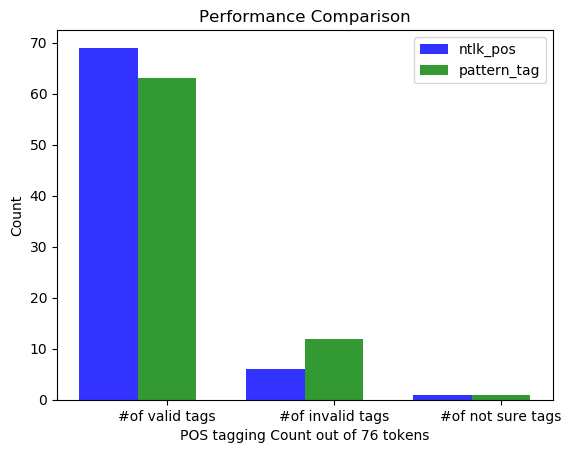

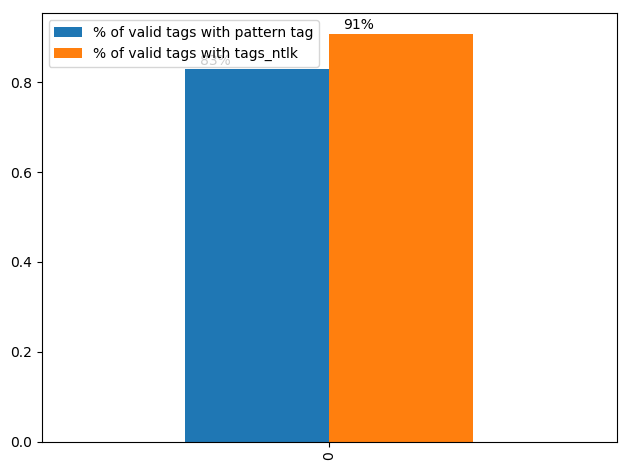

In [237]:
# import matplotlib.pyplot as plt; plt.rcdefaults()
# data to plot
n_groups = 3
means_frank = (69, 6, 1)
means_guido = (63, 12,1)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='ntlk_pos')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='pattern_tag')

plt.xlabel('POS tagging Count out of 76 tokens')
plt.ylabel('Count')
plt.title('Performance Comparison')
plt.xticks(index + bar_width, ('#of valid tags', '#of invalid tags', '#of not sure tags'))
plt.legend()


# plot shows the percentage of valid tags of each tagger
result = pd.DataFrame({"% of valid tags with tags_ntlk": [.9078], "% of valid tags with pattern tag": [.8289]})
ax = (result).plot(kind='bar') 

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.1*width, p.get_y() + height + 0.01))

    
plt.tight_layout()
plt.show()

<a id="manualpos"></a>

# 3. Manual tagging vs nltk pos_tag() and pattern tag()
In a news article from this week’s news, find a random sentence of at least 10 words.
        
        a. Looking at the Penn tag set, manually POS tag the sentence yourself.
        b. Now run the same sentences through both taggers that you implemented for questions
        1 and 2. Did either of the taggers produce the same results as you had created
        manually?
        c. Explain any differences between the two taggers and your manual tagging as much as
        you can.
        
 <a href="#top">Back to top</a>

### Manual POS tagging  
**sentence:**
    "Stephen Hawking's wheelchair, thesis, and 'Simpsons' script are up for grabs" - Science News, NBC

In [274]:
news_sentence =  "Stephen Hawking's wheelchair, thesis, and 'Simpsons' script are up for grabs" 

In [387]:
word_tokens_news  = nltk.word_tokenize(news_sentence) 

Manual_Tagging = [""]
df_pos_manual = pd.DataFrame(word_tokens_news, columns =['Words_manual'] )
df_pos_manual["Manual_POS"] = pd.DataFrame(np.array(["NNP", "NNP", "POS", "NN", ",", 
                                                             "NN", ",", "CC", "NNPS", "'", 
                                                             "NN", "VBP", "JJ", "IN" , "NNS" ]))
df_pos_manual, 


(   Words_manual Manual_POS
 0       Stephen        NNP
 1       Hawking        NNP
 2            's        POS
 3    wheelchair         NN
 4             ,          ,
 5        thesis         NN
 6             ,          ,
 7           and         CC
 8     'Simpsons       NNPS
 9             '          '
 10       script         NN
 11          are        VBP
 12           up         JJ
 13          for         IN
 14        grabs        NNS,)

### NLKT pos_tag() and Pattern tag()

In [388]:
# Tag the sentence using nltk’s recommended pos_tag() function
df_pos_nltk = nltk.pos_tag(word_tokens_news ) 
# put in a dataframe and assign whether for not the tagging is accurate
df_pos_nltk_news = pd.DataFrame([[k, v,] for k,v in df_pos_nltk], 
                                         columns=['Words_nltk','nltk_POS'])

# Tag the sentence using nltk’s recommended pos_tag() function
df_pos_pattern = tag(news_sentence)
# put in a dataframe 
df_pos_pattern_news = pd.DataFrame([[k, v,] for k,v in df_pos_pattern], 
                                         columns=['Words_pattern','pattern_POS'])

print (df_pos_nltk_news.info())
print (df_pos_pattern_news.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
Words_nltk    15 non-null object
nltk_POS      15 non-null object
dtypes: object(2)
memory usage: 312.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
Words_pattern    16 non-null object
pattern_POS      16 non-null object
dtypes: object(2)
memory usage: 328.0+ bytes
None


In [389]:
df_pos_nltk_news.Words_nltk.values


array(['Stephen', 'Hawking', "'s", 'wheelchair', ',', 'thesis', ',',
       'and', "'Simpsons", "'", 'script', 'are', 'up', 'for', 'grabs'],
      dtype=object)

In [393]:
df_pos_pattern_news


,Words_pattern,pattern_POS
0,Stephen,NNP
1,Hawking,NNP
2,'s,POS
3,wheelchair,NN
4,",",","
5,thesis,NN
6,",",","
7,and,CC
8,',POS
9,Simpsons,NNPS


In [396]:
df_pos_pattern_news.pattern_POS.values

[u'NNP', u'NNP', u'POS', u'NN', u',', u'NN', u',', u'CC',
       u'NNPS', u'POS', u'NN', u'VBP', u'IN', u'DT', u'NNS']


array([u'NNP', u'NNP', u'POS', u'NN', u',', u'NN', u',', u'CC', u'POS',
       u'NNPS', u'POS', u'NN', u'VBP', u'IN', u'DT', u'NNS'], dtype=object)

**Note that pattern pos break the ' before Simpsons and assigned is as POS while nltk does not. 
This may due to the fact that nltk needs word tokenization before pos tagging task and it depends on the result of the word tokenization**


### Comparison between the 3 methods

In [409]:
df_news_cat = pd.concat([df_pos_nltk_news,df_pos_manual], axis=1)
# add "'" before Simpsons to be aligned with pattern pos - df_news_cat.iloc[r][c] = some_value.
# df_news_cat.loc[7] = ["'", "", "", ""]  # adding a row
df_news_cat = df_news_cat.drop(['Words_manual'], axis=1)

# add in df_pos_pattern
df_pos_pattern_news['pattern_POS'].values

df_news_cat["pattern_POS"]  = pd.DataFrame(np.array([u'NNP', u'NNP', u'POS', u'NN', u',', u'NN', u',', u'CC',
       u'NNPS', u'POS', u'NN', u'VBP', u'IN', u'DT', u'NNS'])) 

df_news_cat["Comparison_nltk_manual"] = pd.DataFrame(np.array(["same", "same", "same", "same", "same",
                                                   "same", "same", "same", "different","different", 
                                                   "same", "same","different", "same","same"
                                                  ]))

df_news_cat["Comparison_pattern_manual"] = pd.DataFrame(np.array(["same", "same", "same", "same", "same",
                                                   "same", "same", "same", "same","different", 
                                                    "same","same","different", "different",  "same",
                                                  ]))

df_news_cat["Comparison_all_3"] = pd.DataFrame(np.array(["same", "same", "same", "same", "same",
                                                   "same", "same", "same", "different", "different", 
                                                    "same","same","different", "different",  "same",
                                                  ]))
df_news_cat

,Words_nltk,nltk_POS,Manual_POS,pattern_POS,Comparison_nltk_manual,Comparison_pattern_manual,Comparison_all_3
0,Stephen,NNP,NNP,NNP,same,same,same
1,Hawking,NNP,NNP,NNP,same,same,same
2,'s,POS,POS,POS,same,same,same
3,wheelchair,NN,NN,NN,same,same,same
4,",",",",",",",",same,same,same
5,thesis,NN,NN,NN,same,same,same
6,",",",",",",",",same,same,same
7,and,CC,CC,CC,same,same,same
8,'Simpsons,NNS,NNPS,NNPS,different,same,different
9,',POS,',POS,different,different,different


In [414]:
# some statistics
print("\n\n***POS General Comparision Statistics***\n\n",df_news_cat.describe())


# some statistics on how many results are the same between the 3 taggers: 
print ("\n\n***Counts of how many results are the same between the 3 taggers***\n\n", df_news_cat['Comparison_all_3'].value_counts())

# print accuracy count out of 15 tokens
print ("\n\n***Counts of tags with nltk pos_tag vs. manual***\n\n", df_news_cat['Comparison_nltk_manual'].value_counts())

print ("\n\n***Counts of tags with pattern tag vs. manual***\n\n", df_news_cat['Comparison_pattern_manual'].value_counts())




***POS General Comparision Statistics***

        Words_nltk nltk_POS Manual_POS pattern_POS Comparison_nltk_manual  \
count          15       15         15          15                     15   
unique         14        9         11          10                      2   
top             ,       NN         NN          NN                   same   
freq            2        3          3           3                     12   

       Comparison_pattern_manual Comparison_all_3  
count                         15               15  
unique                         2                2  
top                         same             same  
freq                          12               11  


***Counts of how many results are the same between the 3 taggers***

 same         11
different     4
Name: Comparison_all_3, dtype: int64


***Counts of tags with nltk pos_tag vs. manual***

 same         12
different     3
Name: Comparison_nltk_manual, dtype: int64


***Counts of tags with pattern tag vs. man

**In comparison with manual tagging, nltk pos tagger and pattern tagger perform very similar. Each tagger has 12 out of 15 match with manual tagging**
